# RQ1: In the recent years, does study abroad becomes more fiercely?

## (1) Bar Plot: Year* Total Application Number
- IV: Year
- DV: Total Application Number

In [1]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [3]:
y1 = len(df[df['time_year'] == 2015])
y2 = len(df[df['time_year'] == 2016])
y3 = len(df[df['time_year'] == 2017])
y4 = len(df[df['time_year'] == 2018])
y5 = len(df[df['time_year'] == 2019])
y6 = len(df[df['time_year'] == 2020])

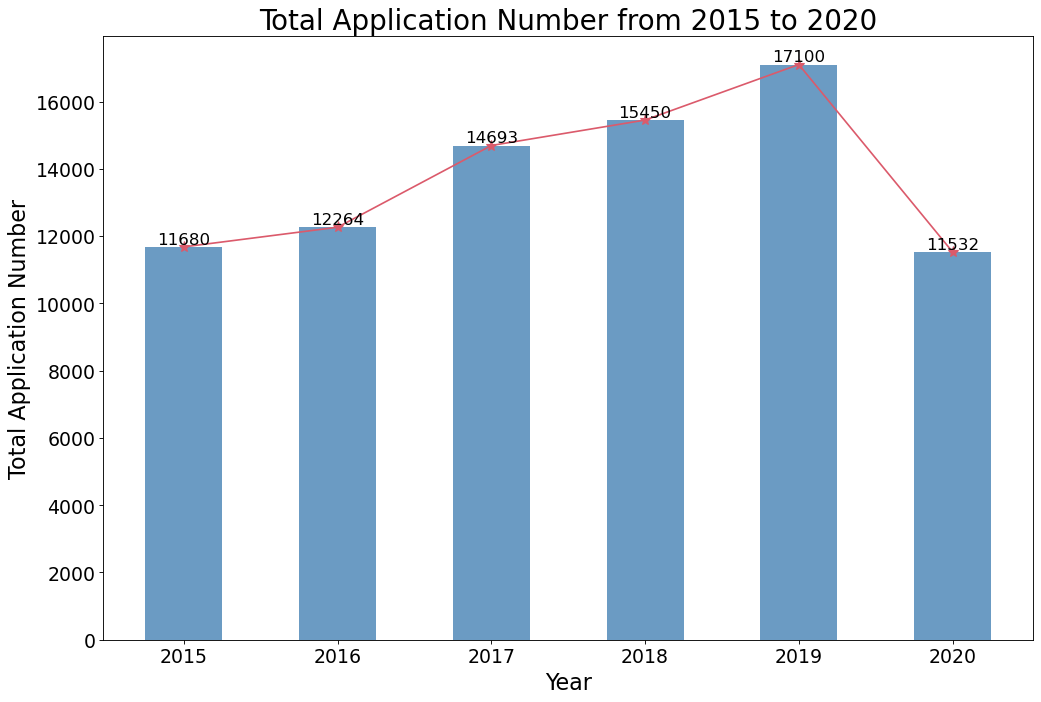

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10), dpi=80)

x = [2015, 2016, 2017, 2018, 2019, 2020]
y = [y1,y2,y3,y4,y5,y6]

# Draw Bar Chart
plt.bar(x=x, height=y, label='number', color='steelblue', alpha=0.8, width=0.5)
# Display specific values on the histogram
# ha: controls the horizontal alignment; va: controls the vertical alignment
for x1, yy in zip(x, y):
    plt.text(x1, yy + 1, str(yy), ha='center', va='bottom', fontsize=15, rotation=0)

# Draw Line Chart
plt.plot(x, y, "r", marker='*', ms=10, color='#db5a6b')

plt.title("Total Application Number from 2015 to 2020",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Total Application Number",fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
#plt.legend(loc="upper left")

plt.savefig("plot1.jpg")
plt.show()

## (2) Bar Plot: Year* Proportion of Offer & Reject & Waiting
- IV: Year
- DV: Proportion of Offer & Reject & Waiting

In [5]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [6]:
df.apply_results.value_counts()

1    72180
0    14535
2     2056
Name: apply_results, dtype: int64

In [7]:
ye1 = df[(df['apply_results'] == 1) & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
ye2 = df[(df['apply_results'] == 0) & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
ye3 = df[(df['apply_results'] == 2) & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values

In [8]:
y1 = ye1.tolist()
y2 = ye2.tolist()
y3 = ye3.tolist()
y3.insert(0,0) # in order to have the same lengh

In [9]:
print(y1,y2,y3)

[10057, 10491, 11898, 12661, 13955, 8784] [1623, 1755, 2381, 2330, 2651, 2323] [0, 18, 414, 459, 494, 425]


[0.8610445205479452, 0.8554305283757339, 0.8097733614646431, 0.8194822006472492, 0.8160818713450292, 0.7617065556711758]
[0.8610445205479452, 0.8554305283757339, 0.8097733614646431, 0.8194822006472492, 0.8160818713450292, 0.7617065556711758]
[0.1389554794520548, 0.1431017612524462, 0.16204995576124684, 0.15080906148867315, 0.15502923976608188, 0.20143947277141866]
[1.0, 0.9985322896281801, 0.9718233172258899, 0.9702912621359223, 0.971111111111111, 0.9631460284425946]
[0.0, 0.0014677103718199608, 0.02817668277411012, 0.02970873786407767, 0.028888888888888888, 0.03685397155740548]
[1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]


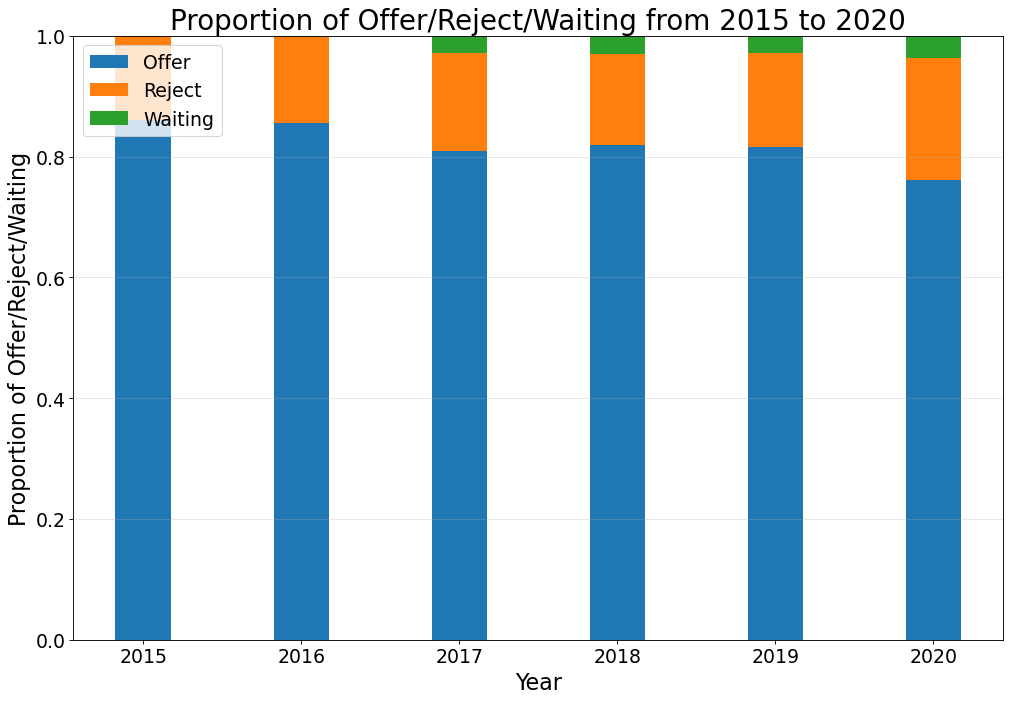

In [10]:
#stacked bar
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10), dpi=80)
plt.grid(axis="y", alpha=0.3)
labels = ['2015', '2016', '2017', '2018', '2019','2020']
data = [y1, y2, y3]
x = range(len(labels))
width = 0.35

# Initialize all bottom_y elements to 0
bottom_y = [0] * len(labels)
# Calculate the sum of each group of columns in preparation for calculating the percentage
sums = [sum(i) for i in zip(y1, y2, y3)]
for i in data:
    y = [a/b for a, b in zip(i, sums)] # Calculate the height of each column (ie. the percentage)
    print(y) # proportion data
    plt.bar(x, y, width, bottom=bottom_y)
    bottom_y = [(a+b) for a, b in zip(y, bottom_y)]# Calculate the position of the bottom parameter
    print(bottom_y)


plt.title('Proportion of Offer/Reject/Waiting from 2015 to 2020', fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Proportion of Offer/Reject/Waiting",fontsize=20)
plt.xticks(x, labels, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['Offer', 'Reject', 'Waiting'],loc="upper left",fontsize=17)
plt.savefig("plot2.jpg")
plt.show()

## (3) Pie Plot: Year* Proportion of Application Degree
- IV: Year
- DV: Proportion of Application Degree

In [11]:
import pandas as pdx
df = pd.read_csv('data_clean.csv')

In [12]:
# delete the '12 - undefinded' group
df = df.drop(df[(df.degree == 12)].index)

In [13]:
df.degree.value_counts()

1     38941
3     18907
2     10264
9      8145
4      6633
8      1759
7      1335
10     1297
11      764
5       225
6       190
Name: degree, dtype: int64

In [14]:
ye = []
for i in range(11):
    y = df[(df['degree'] == i+1) & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
    y = y.tolist()
    ye.append(y)

In [15]:
#calculate proportion 
sums = [sum(i) for i in zip(ye[0], ye[1], ye[2], ye[3], ye[4], ye[5], ye[6], ye[7], ye[8], ye[9], ye[10])]
data = [ye[0], ye[1], ye[2], ye[3], ye[4], ye[5], ye[6], ye[7], ye[8], ye[9], ye[10]]
ypro = []
for i in data:
    y = [a/b for a, b in zip(i, sums)]
    ypro.append(y)

In [16]:
y1 = ypro[0] #MS
y2 = ypro[1] #PHD
y3 = ypro[2] #MA
y4 = ypro[3] #others
y5 = ypro[4] #BA
y6 = ypro[5] #MBA
y7 = ypro[6] #MEd
y8 = ypro[7] #Meng
y9 = ypro[8] #LLM
y10 = ypro[9] #JD
y11 = ypro[10] #MPhil

In [17]:
print(y1, y3, y2, y9, y4, y7, y8, y10, y11, y5, y6)

[0.4028253424657534, 0.41372277066166274, 0.418049013584545, 0.4420539486512837, 0.4476184889723135, 0.483017549986903] [0.24349315068493152, 0.2466345761605613, 0.239060686736296, 0.19850503737406563, 0.20659314875645238, 0.18082598445822054] [0.12988013698630138, 0.11454678958962225, 0.11939381527749335, 0.1089372765680858, 0.1176677616142656, 0.10634768183008819] [0.09674657534246575, 0.09235538875744473, 0.09161034882927162, 0.10302242443938901, 0.08927733458470202, 0.08390814633720423] [0.07268835616438356, 0.08305458105572326, 0.07147245545771043, 0.08020799480013, 0.07138667292351009, 0.08233650571902558] [0.017294520547945204, 0.017051480786489354, 0.015018089972011742, 0.014299642508937277, 0.013901923979352417, 0.015454466078756657] [0.016523972602739728, 0.013461695357754752, 0.017339067513140828, 0.01891452713682158, 0.022876583763491318, 0.02165371518379464] [0.010102739726027397, 0.007342742922411683, 0.01522288210799372, 0.02138446538836529, 0.015368371656499296, 0.01545

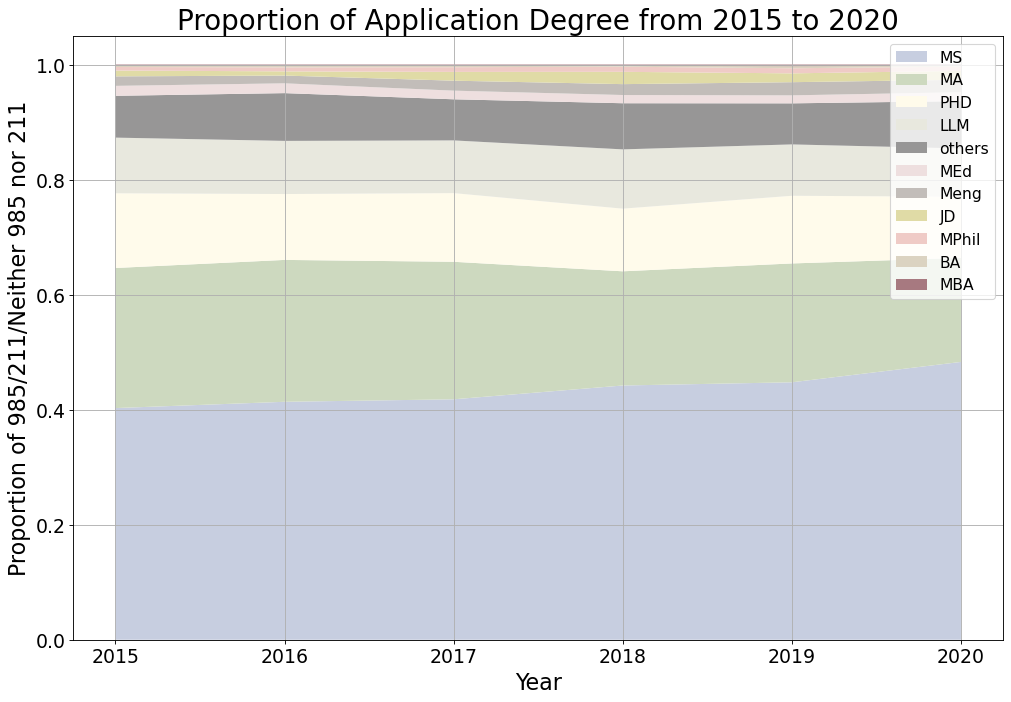

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,10), dpi=80)
plt.grid()

x = [2015,2016,2017,2018,2019,2020]

colors = ['#c7cee0','#cdd9bf','#fffbeb','#e8e8de','#979696','#eedfdf','#c2bdb9','#e0dba6','#efcbc6','#dbd3c1','#a77980']

# draw stackplot
plt.stackplot(x, y1, y3, y2, y9, y4, y7, y8, y10, y11, y5, y6, colors = colors)


plt.title('Proportion of Application Degree from 2015 to 2020', fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Proportion of 985/211/Neither 985 nor 211",fontsize=20)
plt.xticks(x, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['MS','MA','PHD','LLM', 'others','MEd','Meng','JD','MPhil','BA','MBA'],fontsize=14)
plt.savefig("plot3.jpg")
plt.show()

## (4) Pie Plot: Year* Proportion of Graduate University Degree
- IV: Year
- DV: Proportion of Academic Degree of Graduate University

In [19]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [20]:
df = df[(df['undergraduate_sid'] == '1') | (df['undergraduate_sid'] == '2') | (df['undergraduate_sid'] == '3')]
df.undergraduate_sid.value_counts()

2    18175
3     6975
1     2377
Name: undergraduate_sid, dtype: int64

In [21]:
ye1 = df[(df['undergraduate_sid'] == '1') & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
ye2 = df[(df['undergraduate_sid'] == '2') & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
ye3 = df[(df['undergraduate_sid'] == '3') & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values

In [22]:
y1 = ye1.tolist()
y2 = ye2.tolist()
y3 = ye3.tolist()

In [23]:
#calculate proportion
sums = [sum(i) for i in zip(y1, y2, y3)]
data = [y1, y2, y3]
ypro = []
for i in data:
    y = [a/b for a, b in zip(i, sums)]
    ypro.append(y)

In [24]:
y1 = ypro[0] #985
y2 = ypro[1] #211
y3 = ypro[2] #neither 985 nor 211

In [25]:
print(y1,y2,y3)

[0.07227291580257154, 0.08369995600527937, 0.07313476850486582, 0.17873510540788268, 0.15055603079555174, 0.11159263271939328] [0.6665284114475322, 0.6559612846458425, 0.6664700678265998, 0.6040329972502292, 0.6236099230111206, 0.638136511375948] [0.26119867274989633, 0.2603387593488781, 0.2603951636685344, 0.21723189734188816, 0.22583404619332764, 0.2502708559046587]


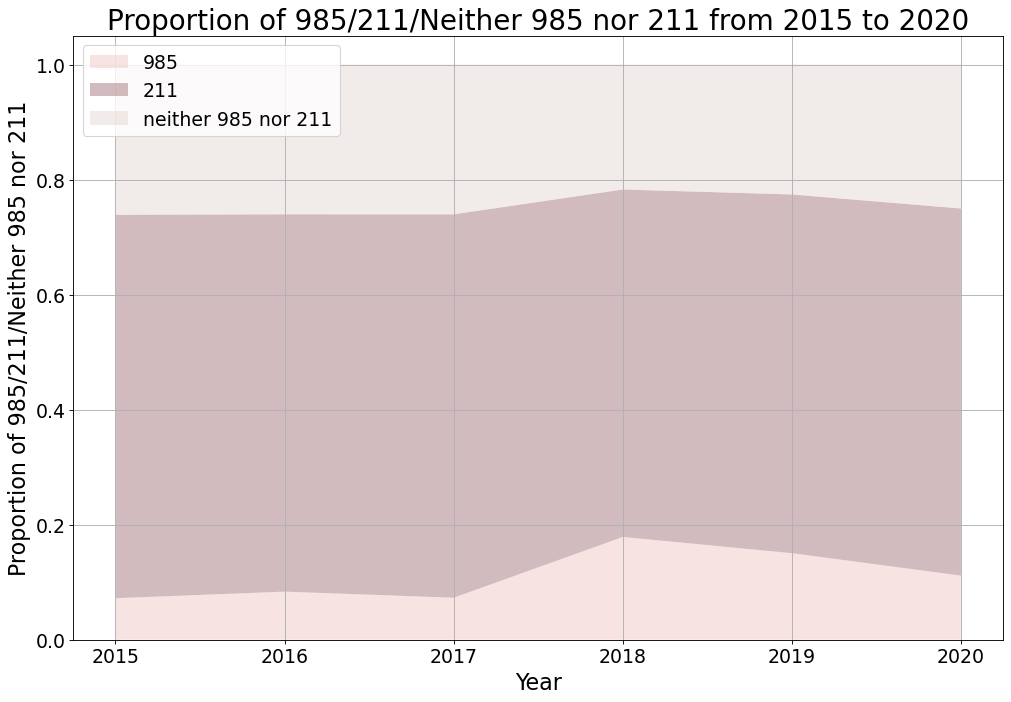

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,10), dpi=80)
plt.grid()

x = [2015,2016,2017,2018,2019,2020]

colors = ['#f0cbc6','#a77980','#e5d9d4']

# draw stackplot
plt.stackplot(x, y1, y2, y3, colors = colors, alpha=0.5)


plt.title('Proportion of 985/211/Neither 985 nor 211 from 2015 to 2020', fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Proportion of 985/211/Neither 985 nor 211",fontsize=20)
plt.xticks(x, fontsize=17)
plt.yticks(fontsize=17)
plt.legend(['985', '211', 'neither 985 nor 211'],loc="upper left",fontsize=17)
plt.savefig("plot4.jpg")
plt.show()

## (5) Scatter Plot: Year* Application Number of Each Applicant* Frequency
- IV1: Year
- IV2: Application Number of Each Applicant
- DV: Frequency

In [27]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [28]:
import collections

x1=df[df['time_year'] == 2015].groupby('uid')['uid'].size()
x2=df[df['time_year'] == 2016].groupby('uid')['uid'].size()
x3=df[df['time_year'] == 2017].groupby('uid')['uid'].size()
x4=df[df['time_year'] == 2018].groupby('uid')['uid'].size()
x5=df[df['time_year'] == 2019].groupby('uid')['uid'].size()
x6=df[df['time_year'] == 2020].groupby('uid')['uid'].size()
dic1 = collections.Counter(x1)
dic2 = collections.Counter(x2)
dic3 = collections.Counter(x3)
dic4 = collections.Counter(x4)
dic5 = collections.Counter(x5)
dic6 = collections.Counter(x6)

k1 = list(dic1.keys())
k2 = list(dic2.keys())
k3 = list(dic3.keys())
k4 = list(dic4.keys())
k5 = list(dic5.keys())
k6 = list(dic6.keys())
#print(k1)
r1 = [dic1[x] for x in dic1]
r2 = [dic2[x] for x in dic2]
r3 = [dic3[x] for x in dic3]
r4 = [dic4[x] for x in dic4]
r5 = [dic5[x] for x in dic5]
r6 = [dic6[x] for x in dic6]
#print(r1)

In [29]:
new = []
for i in range(len(r1)):
    for r in range(r1[i]):
        new.append(k1[i])
for i in range(len(r2)):
    for r in range(r2[i]):
        new.append(k2[i])
for i in range(len(r3)):
    for r in range(r3[i]):
        new.append(k3[i])
for i in range(len(r4)):
    for r in range(r4[i]):
        new.append(k4[i])
for i in range(len(r5)):
    for r in range(r5[i]):
        new.append(k5[i])
for i in range(len(r6)):
    for r in range(r6[i]):
        new.append(k6[i])

In [30]:
year = []
for i in range(sum(r1)):
    year.append('2015')
for i in range(sum(r2)):
    year.append('2016')
for i in range(sum(r3)):
    year.append('2017')
for i in range(sum(r4)):
    year.append('2018')
for i in range(sum(r5)):
    year.append('2019')
for i in range(sum(r6)):
    year.append('2020')
    
new_data = {
    'Number':new,
    'Year':year
}

In [31]:
pdnew = pd.DataFrame.from_dict(new_data)
df = pdnew.drop(pdnew[(pdnew.Number > 10)].index) #in order to have a better view

In [36]:
# k1: Application number of each applicant in 2005
# r1: Frequency of Appication Number in 200
k = [k1,k2,k3,k4,k5,k6]
r = [r1,r2,r3,r4,r5,r6]
for i in range(6):
    print(k[i])
    print(r[i])
    print('\n')

[1, 2, 5, 3, 8, 6, 4, 10, 16, 7, 9, 12, 11, 13, 15, 21, 14, 42, 17, 28, 37]
[1944, 876, 239, 510, 78, 152, 381, 26, 3, 99, 49, 16, 11, 12, 3, 1, 7, 1, 1, 1, 1]


[2, 1, 6, 3, 5, 14, 9, 7, 10, 4, 21, 8, 12, 13, 17, 15, 18, 11, 33, 23, 16, 30, 20, 29]
[938, 1889, 201, 529, 237, 8, 40, 113, 29, 379, 2, 74, 11, 9, 2, 6, 2, 17, 1, 2, 4, 1, 1, 1]


[1, 2, 3, 6, 8, 4, 12, 5, 17, 7, 11, 10, 9, 13, 14, 15, 19, 29, 16, 18, 20, 22, 21]
[2411, 976, 593, 226, 96, 385, 25, 292, 4, 157, 19, 57, 77, 12, 8, 5, 1, 1, 1, 1, 1, 1, 1]


[2, 1, 3, 6, 5, 10, 9, 4, 8, 7, 11, 15, 12, 22, 14, 13, 18, 26, 20, 17, 28, 16]
[1091, 2828, 659, 211, 306, 41, 66, 410, 110, 159, 29, 6, 18, 1, 6, 12, 2, 1, 1, 1, 1, 1]


[1, 2, 4, 3, 7, 5, 6, 13, 8, 10, 11, 12, 14, 9, 16, 17, 18, 19, 20, 15, 27, 23, 24]
[3676, 1242, 432, 685, 145, 307, 231, 14, 119, 50, 26, 19, 9, 69, 5, 1, 2, 1, 2, 4, 1, 1, 1]


[1, 9, 10, 3, 7, 5, 2, 4, 6, 8, 11, 26, 16, 12, 15, 14, 18, 25, 13, 21, 19, 27, 28]
[1346, 72, 43, 406, 139, 240, 574, 338, 194

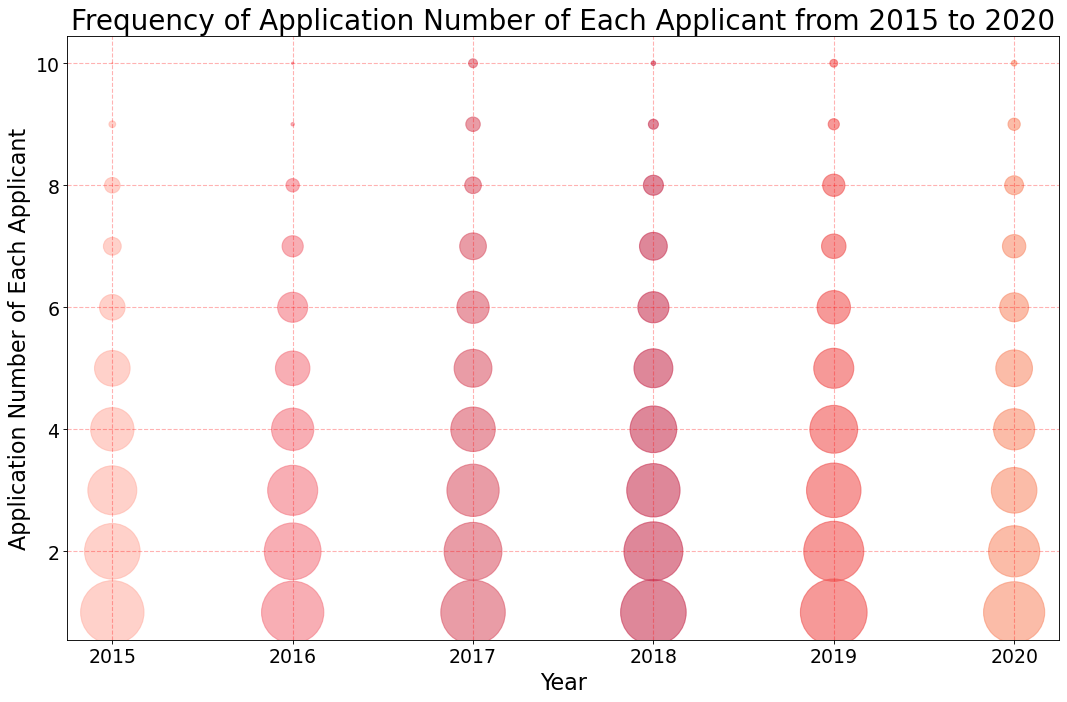

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
ax.grid(color='r',
        linestyle='--',
        linewidth=1,
        alpha=0.3)

df_counts = df.groupby(['Year', 'Number']).size().reset_index(name='counts')
#print(df_counts)

size = df_counts['counts'].rank()
#RGB color selected: https://www.sohu.com/a/285054660_99948935
color={'2015':'#ffb3a7','2016':'#f47983','2017':'#db5a6b','2018':'#c93756','2019':'#f05654','2020':'#f9906f'}
colors = ['lightblue','lightpink','darkseagreen','khaki','darkgreen','lavender']
plt.scatter(df_counts['Year'],df_counts['Number'],s=size*size,alpha=0.6,color=[color[i] for i in df_counts['Year']])

plt.title("Frequency of Application Number of Each Applicant from 2015 to 2020", fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Application Number of Each Applicant",fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.savefig("plot6.png")
plt.show()

## (6) Violin Plot: Year* Offer & Reject or waiting* IELTs Score
- IV1: Year
- IV2: Offer & Reject or waiting
- DV: Ielts Score

In [37]:
df = pd.read_csv('data_clean.csv')

In [38]:
df['apply_results'].replace(1,'offer',inplace=True)
df['apply_results'].replace([0,2],'reject or waiting',inplace=True)

In [39]:
df.apply_results.value_counts()

offer                72180
reject or waiting    16591
Name: apply_results, dtype: int64

In [40]:
df2 = df.drop(df[(df.ieltsz < 5)].index) # to have a better plot view

In [42]:
#changes of mean score
df[(df['time_year']>2014) 
   & (df['time_year']<2021) 
   & (df['ieltsz']>0)
   & (df['apply_results']=='offer')].groupby(by = 'time_year')['ieltsz'].mean()

time_year
2015    6.090482
2016    6.321798
2017    6.812629
2018    6.787013
2019    6.790375
2020    6.867072
Name: ieltsz, dtype: float64

In [33]:
#changes of mean score
df[(df['time_year']>2014) 
   & (df['time_year']<2021) 
   & (df['ieltsz']>0)
   & (df['apply_results']=='reject or waiting')].groupby(by = 'time_year')['ieltsz'].mean()

time_year
2015    6.143617
2016    6.346626
2017    6.931237
2018    6.933158
2019    6.866239
2020    6.931392
Name: ieltsz, dtype: float64

In [34]:
# take 2015 for example
r1=df[(df['time_year'] == 2015) 
      & (df['ieltsz']>0)
      & (df['apply_results'] == 'offer') ].groupby('ieltsz')['ieltsz'].size()
print(r1)
r2=df[(df['time_year'] == 2015)
      & (df['ieltsz']>0)
      & (df['apply_results'] == 'reject or waiting')].groupby('ieltsz')['ieltsz'].size()
print(r2)
#-> similar ielts score distribution between those get 'offer' and those get 'reject or waiting'

ieltsz
4.5       5
5.0      37
5.5     737
6.0    1985
6.5     747
7.0     225
7.5      82
8.0       9
8.5       7
9.0       1
Name: ieltsz, dtype: int64
ieltsz
4.5      1
5.0      5
5.5     61
6.0    171
6.5    104
7.0     24
7.5     10
Name: ieltsz, dtype: int64


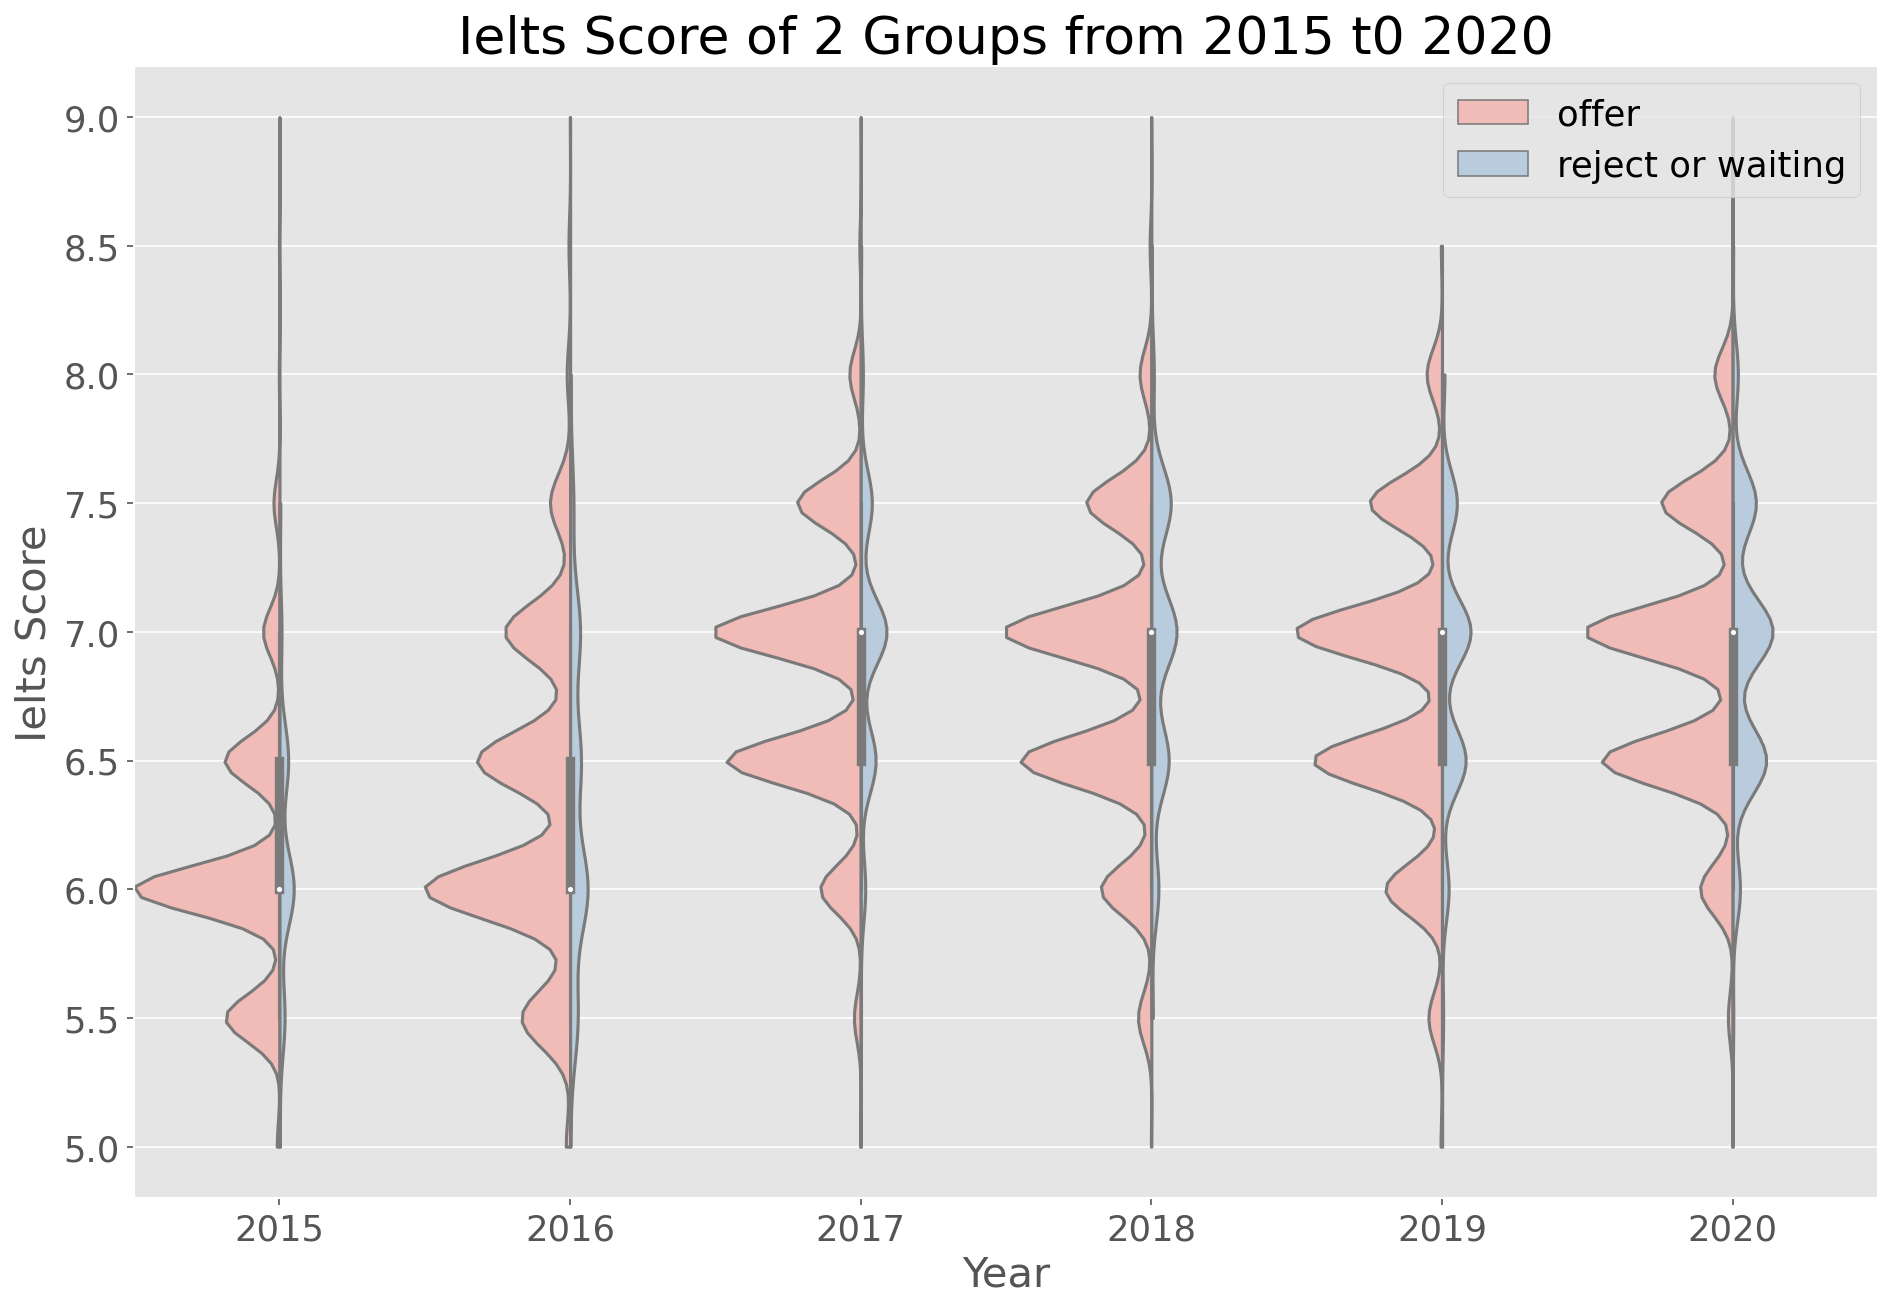

In [41]:
# Draw violinplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10), dpi= 150)

# Set drawing style
plt.style.use('ggplot')

# Draw grouped violinplot
sns.violinplot(x = "time_year", # Specify the x-axis data
               y = "ieltsz", # Specify the y-axis data
               hue = "apply_results", # Specify grouping variables
               data = df2, # Specify the data set for the plot
               order = [2015,2016,2017,2018,2019,2020], # Specify the order of the x-axis tick labels
               scale = 'count', # Adjust the left and right width of the violin chart by the amount
               split = True,
               palette = 'Pastel1',
               #inner='quartiles',
               width=1,
               cut = 0
               #showmeans=False,
               #showmedians=True
              )

plt.title('Ielts Score of 2 Groups from 2015 t0 2020',fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Ielts Score",fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(fontsize=17)
plt.savefig("plot5.png")
plt.show()

## (7) Line Plot: Year* HK Top6* Application Number
- IV1: Year
- IV2: HK Top6
- DV: Application Number

In [1]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [2]:
toplist = [308,309,310,311,312,313]  #representing HK Top6 stored in df['sid']
ylist = []
for i in range(6):
    ye = df[(df['sid'] == toplist[i]) & (df['time_year'] > 2014) & (df['time_year'] < 2021) ].groupby('time_year')['time_year'].size().values
    y = ye.tolist()
    ylist.append(y)

In [3]:
ylist

[[654, 654, 799, 877, 632, 284],
 [295, 313, 468, 532, 573, 226],
 [320, 334, 388, 422, 390, 231],
 [706, 594, 647, 658, 623, 175],
 [383, 290, 428, 349, 328, 150],
 [296, 275, 207, 222, 221, 60]]

[654, 654, 799, 877, 632, 284]
[295, 313, 468, 532, 573, 226]
[320, 334, 388, 422, 390, 231]
[706, 594, 647, 658, 623, 175]
[383, 290, 428, 349, 328, 150]
[296, 275, 207, 222, 221, 60]


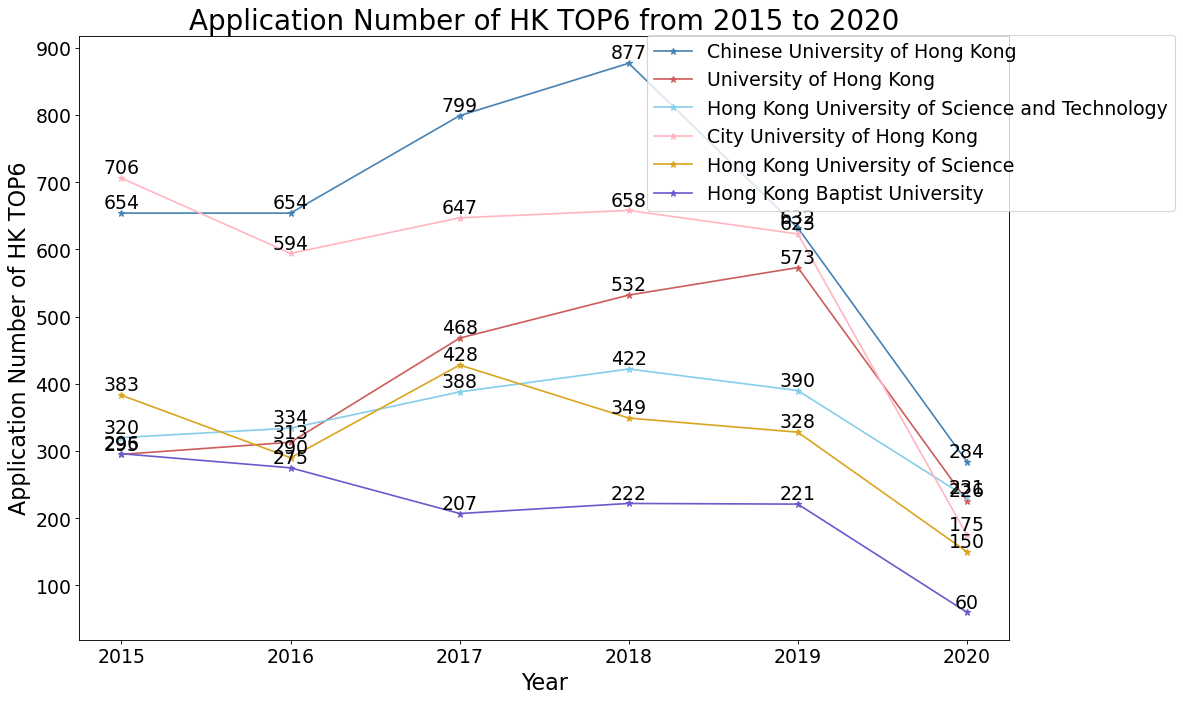

In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10), dpi=80)
x = ['2015', '2016', '2017', '2018', '2019', '2020']


for i in range(6):
    print(ylist[i])
    for x1, yy in enumerate(ylist[i]):
        plt.text(x1, yy + 1, str(yy), ha='center', va='bottom', fontsize=17, rotation=0)

plt.plot(np.arange(len(x)), ylist[0], marker='*',color='steelblue',label='Chinese University of Hong Kong')
plt.plot(np.arange(len(x)), ylist[1], marker='*',color='indianred', label='University of Hong Kong')
plt.plot(np.arange(len(x)), ylist[2], marker='*',color='skyblue', label='Hong Kong University of Science and Technology')
plt.plot(np.arange(len(x)), ylist[3], marker='*',color='lightpink', label='City University of Hong Kong')
plt.plot(np.arange(len(x)), ylist[4], marker='*',color='goldenrod', label='Hong Kong University of Science')
plt.plot(np.arange(len(x)), ylist[5], marker='*',color='slateblue', label='Hong Kong Baptist University')

plt.title("Application Number of HK TOP6 from 2015 to 2020",fontsize=25)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Application Number of HK TOP6",fontsize=20)
plt.xticks(range(6), ('2015', '2016', '2017', '2018', '2019','2020'),fontsize=17) 
plt.yticks(fontsize=17)
plt.legend(loc=(0.61,0.71),fontsize=17)
#plt.savefig("plot7.png")
plt.show()

## (8) Dynamic Plot: Year* World Top10* Application Number
- IV1: Year
- IV2: World Top10
- DV: Application Number

- Massachusetts Institute of Technology：9
- University of Oxford：325
- Stanford University：11
- University of Cambridge：326
- Harvard University：3
- California Institute of Technology：8
- Imperial College London：328
- Swiss Federal Institute of Technology in Zurich：885
- University College London：329
- University of Chicago：15

MADE BY: https://flourish.studio/

In [8]:
import pandas as pd
df = pd.read_csv('data_clean.csv')

In [9]:
ylist = []
yearlist = [2015,2016,2017,2018,2019,2020]
for i in range(6):
    print(yearlist[i])
    ye = df[(df['time_year'] == yearlist[i]) &
           ((df['sid'] == 9) |
            (df['sid'] == 325)|
            (df['sid'] == 11)|
            (df['sid'] == 326)|
            (df['sid'] == 3)|
            (df['sid'] == 8)|
            (df['sid'] == 328)|
            (df['sid'] == 885)|
            (df['sid'] == 329)|
            (df['sid'] == 15)
           )].groupby('sid')['sid'].size()
    y = ye.tolist()
    print(y)
    ylist.append(y)

2015
[81, 4, 28, 38, 60, 14, 25, 33, 131]
2016
[75, 10, 35, 42, 82, 27, 32, 51, 181]
2017
[113, 14, 44, 38, 97, 33, 36, 70, 251]
2018
[95, 7, 40, 41, 124, 58, 58, 101, 255]
2019
[109, 5, 32, 28, 195, 55, 60, 144, 276]
2020
[70, 3, 13, 28, 165, 36, 34, 103, 197, 1]


In [10]:
for i in range(5):
    ylist[i].insert(9,0) #in order to have the same lenth

In [11]:
ylist

[[81, 4, 28, 38, 60, 14, 25, 33, 131, 0],
 [75, 10, 35, 42, 82, 27, 32, 51, 181, 0],
 [113, 14, 44, 38, 97, 33, 36, 70, 251, 0],
 [95, 7, 40, 41, 124, 58, 58, 101, 255, 0],
 [109, 5, 32, 28, 195, 55, 60, 144, 276, 0],
 [70, 3, 13, 28, 165, 36, 34, 103, 197, 1]]

In [12]:
university = ['Harvard University','California Institute of Technology','Massachusetts Institute of Technology','Stanford University','University of Chicago','University of Oxford','University of Cambridge','Imperial College London','University College London','Swiss Federal Institute of Technology in Zurich']
data_top10 = {
    'University':university,
    '2015':ylist[0],
    '2016':ylist[1],
    '2017':ylist[2],
    '2018':ylist[3],
    '2019':ylist[4],
    '2020':ylist[5],
}

In [13]:
pd_data_top10 = pd.DataFrame.from_dict(data_top10)
pd_data_top10.index = pd_data_top10['University']
pd_data_top10 = pd_data_top10.drop(['University'],axis =1)

In [14]:
pd_data_top10

,2015,2016,2017,2018,2019,2020
University,,,,,,
Harvard University,81,75,113,95,109,70
California Institute of Technology,4,10,14,7,5,3
Massachusetts Institute of Technology,28,35,44,40,32,13
Stanford University,38,42,38,41,28,28
University of Chicago,60,82,97,124,195,165
University of Oxford,14,27,33,58,55,36
University of Cambridge,25,32,36,58,60,34
Imperial College London,33,51,70,101,144,103
University College London,131,181,251,255,276,197


In [15]:
pd_data_top10.to_csv('top10.csv')
# Then import this csv file to flourish.studio